In [1]:
# Ficheros primarios necesarios.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier


from collections import Counter

# Gráficos
# ==============================================================================
from matplotlib import style


rcParams['figure.figsize'] = 14, 8.7 
LABELS = ["Normal","Fraud"]
%matplotlib inline

### Dataframe. 

In [2]:
mainpath = "/Users/macbook/Python Programs/datasets/"
filename = "Datos/BaseDatos2020.xlsx"
fullpad = fullpath = os.path.join(mainpath, filename)

In [3]:
df = pd.read_excel(fullpath)

In [4]:
df.head(10)

,Edad,Sexo_T,PlazoYr360,PrimaAnualEst,Frec_Pago_Mensual,Sobrevive
0,66,0,1.000000,1.917595,0,0
1,41,1,1.000000,0.018418,1,0
2,66,0,1.000000,-0.149204,1,0
3,32,1,1.000000,-0.348033,0,0
4,49,1,2.116667,0.141711,1,1
5,41,0,1.802778,2.750068,1,1
6,32,0,2.508333,0.865052,0,1
7,25,0,1.083333,-0.107941,1,0
8,62,0,2.483333,-0.293556,1,1
9,55,0,2.425000,-0.071503,1,1


In [5]:
# Eliminando PlazoYr360
df1= df.drop(['PlazoYr360'], axis=1)

In [6]:
df1.head(10)

,Edad,Sexo_T,PrimaAnualEst,Frec_Pago_Mensual,Sobrevive
0,66,0,1.917595,0,0
1,41,1,0.018418,1,0
2,66,0,-0.149204,1,0
3,32,1,-0.348033,0,0
4,49,1,0.141711,1,1
5,41,0,2.750068,1,1
6,32,0,0.865052,0,1
7,25,0,-0.107941,1,0
8,62,0,-0.293556,1,1
9,55,0,-0.071503,1,1


### Implementación de regresión logística. Antes de la penalización para ejecutar las primeras funciónes y los datos de entrenamiento del dataframe.

/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Intercept: [-4.42481811]
Coeficiente: [('Edad', 0.028280910073867235), ('Sexo_T', 0.059785698287798346), ('PrimaAnualEst', -0.03195772440631821), ('Frec_Pago_Mensual', 2.0962334249888657)]
Accuracy de entrenamiento: 0.7884925915601118


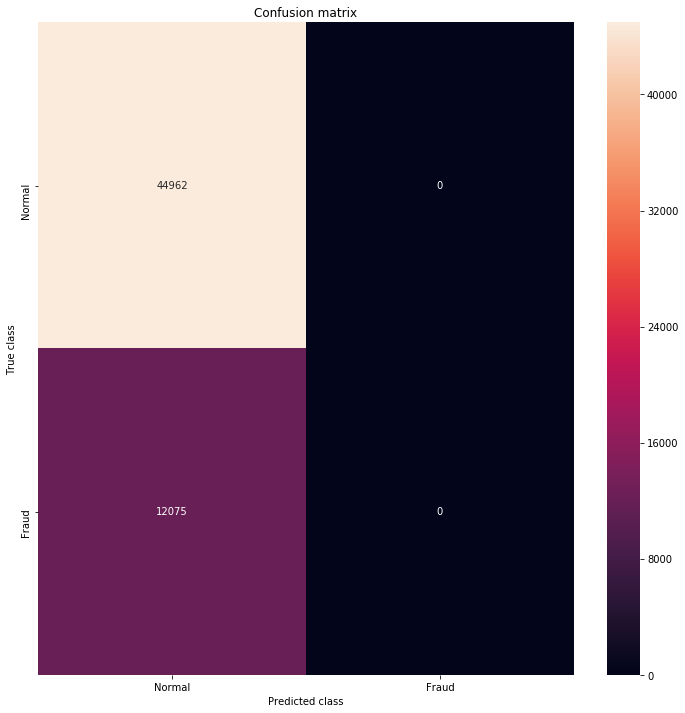

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     44962
           1       0.00      0.00      0.00     12075

   micro avg       0.79      0.79      0.79     57037
   macro avg       0.39      0.50      0.44     57037
weighted avg       0.62      0.79      0.69     57037



/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [10]:
y = df1['Sobrevive']
X = df1.drop('Sobrevive', axis=1)
#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
 
#creamos una función que crea el modelo que usaremos cada vez
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    result = clf_base.fit(X_train, y_train)
    print("Intercept:", clf_base.intercept_)
    print("Coeficiente:", list(zip(X.columns, clf_base.coef_.flatten(), )))
    print("Accuracy de entrenamiento:", clf_base.score(X, y))
    
    
    return clf_base
  


 
#ejecutamos el modelo "tal cual"
model = run_model(X_train, X_test, y_train, y_test)

 
#definimos funciona para mostrar los resultados
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))
 
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)


### Modelo. Estrategia penalización. 

Intercept: [-3.13457614]
Coeficiente: [('Edad', 0.02875850197961821), ('Sexo_T', 0.05607422368217699), ('PrimaAnualEst', -0.031822729420372654), ('Frec_Pago_Mensual', 2.1040465764878045)]
Accuracy de entrenamiento: 0.5587546878040827


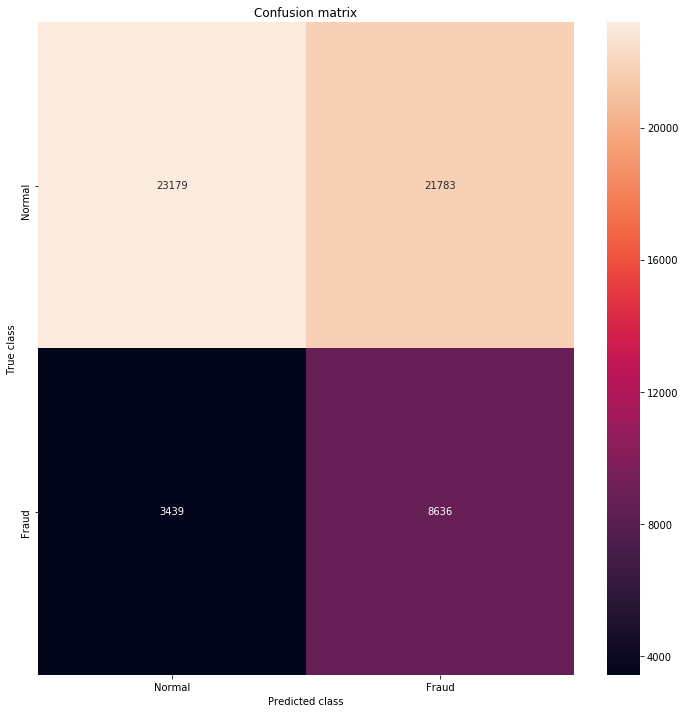

              precision    recall  f1-score   support

           0       0.87      0.52      0.65     44962
           1       0.28      0.72      0.41     12075

   micro avg       0.56      0.56      0.56     57037
   macro avg       0.58      0.62      0.53     57037
weighted avg       0.75      0.56      0.60     57037



In [11]:
def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    clf.fit(X_train, y_train)
    print("Intercept:", clf.intercept_)
    print("Coeficiente:", list(zip(X.columns, clf.coef_.flatten(), )))
    print("Accuracy de entrenamiento:", clf.score(X, y))
    return clf
 
model = run_model_balanced(X_train, X_test, y_train, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

